<center><img src=https://i.ytimg.com/vi/u1ohf43prpo/maxresdefault.jpg> </center>

<font color="red" size=5><center>🔴POKEMON Deep Analysis🔴</center></font>

In [ ]:
import pandas as pd
import numpy as np
import urllib
from colorama import Fore, Back, Style
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA

In [ ]:
df_full = pd.read_csv('../input/pokemon/Pokemon.csv')
df_full.drop(columns=['#'],axis=1, inplace=True)

In [ ]:
df_full.head(8).T

In [ ]:
df_full.describe().T

In [ ]:
df_full.info()

In [ ]:
cols = df_full.columns
for col in cols: 
    print(f'{y_}Unique values in    {r_}{col} : {r_}{df_full[col].nunique()}')

In [ ]:
print(f'{y_}Shape of dataframe: {b_}{df_full.shape} {y_}and total null values: {b_}{df_full.isna().sum().sum()}')

Let us check the null value columns

In [ ]:
import missingno as msno
msno.bar(df_full,(8,6),color='red')
plt.title('MISSING VALUES',fontsize=14)

Okay `Type-2` has all the missing values we will deal with this later

In [ ]:
df_full['Legendary_map'] = df_full["Legendary"].astype(int)
df = df_full.copy()
df.drop(columns = ['Type 2'], axis=1, inplace=True)

In [ ]:
df_full.info()

In [ ]:
cols = [ 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']
sns.pairplot(df,hue='Legendary_map',vars=cols,corner=True,plot_kws=dict(linewidth=0, alpha=1),height=4)

We can see a few linear correlations. We will dwelve deeper into individual columns later. 
Also we can see that Legendary Pokemons have everything on the upper end which proves why they are Legendary.

In [ ]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap="viridis",annot=True)

**OBSERVATIONS** :

* Attack, Special Attack, Special Defence have high correlation on Total Rating of the Pokemon.. 
* Speed and Defence do not have any correlation but speed has good correlation with Special Defence

Now let us start looking at individual columns.

Let us start with the column Type-1

In [ ]:
sns.set_style('dark')
plt.figure(figsize=(16,6))
sns.countplot(df_full['Type 1'],
             palette=['#7ec63c','#f0560f','#3ba7fa','#aab31f','#d5cec8','#9e58a0','#f8bc16','#dabe6a','#f9bef8','#944526','#ef4681','#c1a961','#6f72bd','#7ddbf7','#7059d8','#584537','#9ea0af','#8fa3ec'])

In the above figure we can see Water and Normal Pokemon types are in high number. 

**FUN FACT**: Pokemon types are represented with the same color as they are represented above.

In [ ]:
sns.set_style('dark')
plt.figure(figsize=(16,12))
plt.subplot(211)
sns.countplot(df_full['Type 1'], hue=df_full['Generation'],palette='hot',linewidth=0,alpha=1)
plt.subplot(212)
sns.countplot(df_full['Type 1'], hue= df_full['Legendary'], palette='hot_r', linewidth=0, alpha=1)

* I know the above plot looks somewhat like Germany Flag. However,lot of Gen-1 pokemons in first 5 types and then other Gen pokemons are higher at the near end.
* Also most of the legendary pokemons are psychic or dragon type. 

Now let us directly move to Total column as there are few missing values in Type-2 which we will deal with later

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(df_full['Total'],color='red',hist_kws={'alpha':1,"linewidth": 4}, kde_kws={"color": "black", "lw": 2, "label": "KDE"})
plt.title('Distribution of Total', fontdict = {'size': 12})
# plt.xlabel('Percentage of correct answers', size = 12)

We can see a spike near 300 and 500

In [ ]:
print(f"{y_}The Pokemons with highest TOTAL are \n{r_}{df.loc[df['Total'] == df_full['Total'].max()]['Name']}")

<center><img src=https://pokemegas.weebly.com/uploads/5/1/0/6/51066141/3684104_orig.jpg></center>
<center><img src=https://i.pinimg.com/originals/a4/07/8d/a4078df3838c597973949c27d0b526c7.jpg></center>

In [ ]:
print(f"{y_}The Pokemon with lowest TOTAL is \n{b_}{df.loc[df['Total'] == df_full['Total'].min()]['Name']}")

<center><img src=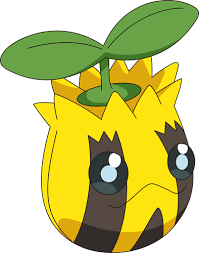></center>

In [ ]:
cols = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']
for i,c in enumerate(cols): 

    sns.set_style('whitegrid')
    g = sns.FacetGrid(df_full, col="Generation", hue='Legendary_map', height=2.5, aspect=0.8,palette=['red','black'])
    g.set_axis_labels("Total", c)
    g.map(sns.scatterplot, 'Total', c)


We have so many plots and we can infer a lot of things from it. 
* Most of the legendary pokemons (black points) are on the right side and around top for each plot which shows why they are legendary
* As we move over generations the plots look more organized for each column.

In [ ]:
print(f"{y_}The Pokemon with highest HP is \n{b_}{df.loc[df['HP'] == df_full['HP'].max()]['Name']}")
print(f"\n{y_}The Pokemon with lowest HP is \n{b_}{df.loc[df['HP'] == df_full['HP'].min()]['Name']}")

In [ ]:
f = urllib.request.urlopen("https://pokestop.io/img/pokemon/blissey-256x256.png")
f1 = urllib.request.urlopen("https://img.rankedboost.com/wp-content/plugins/pokemon-sword-shield/assets/pokemon-images-regular/Shedinja.png")
img = mpimg.imread(f)
img1 = mpimg.imread(f1)

plt.figure(figsize=(10,10))
plt.subplot(121)
imgplot = plt.imshow(img)
plt.title('Highest HP')
plt.axis('off')


plt.subplot(122)
imgplot1 = plt.imshow(img1)
plt.axis('off')
plt.title('Lowest HP')

plt.show()

In [ ]:
print(f"{y_}The Pokemon with highest Attack is \n{b_}{df.loc[df['Attack'] == df_full['Attack'].max()]['Name']}")
print(f"\n{y_}The Pokemon with lowest Attack is \n{b_}{df.loc[df['Attack'] == df_full['Attack'].min()]['Name']}")

In [ ]:
f = urllib.request.urlopen("https://in.portal-pokemon.com/play/resources/pokedex/img/pm/dc96945bf5cb7f776f0272bf17ebf0d4593a5849.png")
f1 = urllib.request.urlopen("https://www.serebii.net/swordshield/pokemon/113.png")
f2 = urllib.request.urlopen("https://www.serebii.net/swordshield/pokemon/440.png")

img = mpimg.imread(f)
img1 = mpimg.imread(f1)
img2 = mpimg.imread(f2)

plt.figure(figsize=(15,15))
plt.subplot(131)
imgplot = plt.imshow(img)
plt.title('Highest Attack')
plt.axis('off')


plt.subplot(132)
imgplot1 = plt.imshow(img1)
plt.axis('off')
plt.title('Lowest Attack')

plt.subplot(133)
imgplot1 = plt.imshow(img2)
plt.axis('off')
plt.title('Lowest Attack')

plt.show()

In [ ]:
print(f"{y_}The Pokemon with highest Defense is \n{b_}{df.loc[df['Defense'] == df_full['Defense'].max()]['Name']}")
print(f"\n{y_}The Pokemon with lowest Defense is \n{b_}{df.loc[df['Defense'] == df_full['Defense'].min()]['Name']}")

Both Chansey and Happiny have least defense so we will not see them again

In [ ]:
f = urllib.request.urlopen("https://sg.portal-pokemon.com/play/resources/pokedex/img/pm/f6e89e59cf6c2de593179ff7c2825403fdd494e7.png")
f1 = urllib.request.urlopen("https://www.serebii.net/swordshield/pokemon/213.png")
f2 = urllib.request.urlopen("https://i.pinimg.com/originals/a6/72/1e/a6721e086b20846b79050bff722a56c5.png")

img = mpimg.imread(f)
img1 = mpimg.imread(f1)
img2 = mpimg.imread(f2)

plt.figure(figsize=(15,15))
plt.subplot(131)
imgplot = plt.imshow(img)
plt.title('Highest Defense')
plt.axis('off')


plt.subplot(132)
imgplot1 = plt.imshow(img1)
plt.axis('off')
plt.title('Highest Defense')

plt.subplot(133)
imgplot1 = plt.imshow(img2)
plt.axis('off')
plt.title('Highest Defense')

plt.show()

<font color="chocolate" size=+2.5><b>My Other Kernels</b></font>

Click on the button to view kernel...


<a href="https://www.kaggle.com/nitindatta/fifa-in-depth-analysis-with-linear-regression" class="btn btn-success" style="color:white;">FIFA In-Depth Analysis</a><br><br>

<a href="https://www.kaggle.com/nitindatta/storytelling-with-gwd-pre-print-data" class="btn btn-success" style="color:white;">Storytelling with GWD pre_print data</a><br><br>

<a href="https://www.kaggle.com/nitindatta/ensemble-learning-part-1" class="btn btn-success" style="color:white;">Ensemble Learning Part 1</a><br><br>

<a href="https://www.kaggle.com/nitindatta/ensemble-learning-part-2" class="btn btn-success" style="color:white;">Ensemble Learning Part 2</a><br><br>

<a href="https://www.kaggle.com/nitindatta/students-performance-in-exams-eda-in-depth" class="btn btn-success" style="color:white;">Students performance in Exams- EDA in depth 📊📈</a><br><br>

<a href="https://www.kaggle.com/nitindatta/pulmonary-embolism-dicom-preprocessing-eda" class="btn btn-success" style="color:white;">🩺Pulmonary Embolism Dicom preprocessing & EDA🩺</a><br><br>

<a href="https://www.kaggle.com/nitindatta/first-kaggle-submission" class="btn btn-success" style="color:white;">Titanic: Machine Learning from Disaster</a><br><br>

<a href="https://www.kaggle.com/nitindatta/graduate-admission-chances" class="btn btn-success" style="color:white;">📖 Graduate Admission Chances 📕 📔</a><br><br>

<a href="https://www.kaggle.com/nitindatta/flower-classification-augmentations-eda" class="btn btn-success" style="color:white;">Flower_Classification+Augmentations+EDA</a><br><br>

<a href="https://www.kaggle.com/nitindatta/storytelling-with-gwd-pre-print-data" class="btn btn-success" style="color:white;">Storytelling with GWD pre_print data</a><br><br>


### If these kernels impress you,give them an <font size="+2" color="red"><b>Upvote</b></font>.<br>

<a href="#toc" class="btn btn-primary" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to TOP</a>

<font color="red" size=5><center>🚧WORK UNDER PROGRESS🚧</center></font>